# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [233]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Load the Data

In [234]:
df = pd.read_csv('Traffic_Accidents.csv')

In [235]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1.0,1.0,27/11/2009,6.0,...,-1.0,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009.0
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2.0,1.0,10/10/2010,1.0,...,6.0,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010.0
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2.0,1.0,14/09/2005,4.0,...,3.0,4055.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005.0
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1.0,2.0,18/08/2007,7.0,...,6.0,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007.0
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2.0,2.0,06/08/2013,3.0,...,-1.0,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013.0


In [236]:
df.tail()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
12949,568780.0,158260.0,0.419608,51.298388,46,3.0,2.0,1.0,13/12/2007,5.0,...,3.0,228.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2007.0
12950,411740.0,295180.0,-1.828286,52.554309,20,3.0,1.0,1.0,30/11/2009,2.0,...,-1.0,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,2009.0
12951,600750.0,217070.0,0.911164,51.816141,42,3.0,2.0,2.0,11/11/2011,6.0,...,-1.0,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Wet/Damp,2.0,Yes,2011.0
12952,344280.0,660420.0,-2.891162,55.833819,95,3.0,2.0,1.0,03/10/2010,1.0,...,6.0,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2010.0
12953,256340.0,661480.0,-4.294857,55.825165,97,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12954 entries, 0 to 12953
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        12954 non-null  float64
 1   Location_Northing_OSGR                       12954 non-null  float64
 2   Longitude                                    12954 non-null  float64
 3   Latitude                                     12954 non-null  float64
 4   Police_Force                                 12954 non-null  int64  
 5   Accident_Severity                            12861 non-null  float64
 6   Number_of_Vehicles                           12953 non-null  float64
 7   Number_of_Casualties                         12670 non-null  float64
 8   Date                                         12953 non-null  object 
 9   Day_of_Week                                  12953 non-null  float64
 10

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [238]:
df.dtypes

,0
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,float64
Number_of_Vehicles,float64
Number_of_Casualties,float64
Date,object
Day_of_Week,float64


In [239]:
df.shape

(12954, 26)

In [240]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,12954.000000,1.295400e+04,12954.000000,12954.000000,12954.000000,12861.000000,12953.000000,12670.000000,12953.000000,12953.000000,12953.000000,12953.000000,12953.000000,12953.000000,12953.000000,12929.000000,12953.000000
mean,440661.778447,2.995216e+05,-1.421413,52.583548,30.390459,2.837104,1.841349,1.363694,4.137497,349.344553,4.081912,1015.600247,39.176253,2.645642,363.158882,1.356949,2009.393114
std,95456.798326,1.613505e+05,1.402294,1.453116,25.600484,0.404075,0.714654,0.862754,1.927342,259.683558,1.434489,1829.939970,14.253914,3.211933,1261.690765,0.479118,2.999180
min,145640.000000,1.903000e+04,-6.193033,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375008.750000,1.778425e+05,-2.372936,51.486144,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,441836.500000,2.666150e+05,-1.380100,52.288767,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,132.000000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,524077.500000,3.983825e+05,-0.206367,53.480331,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,735.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654950.000000,1.183525e+06,1.753632,60.532880,98.000000,3.000000,10.000000,42.000000,7.000000,940.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,2.000000,2014.000000


In [241]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,93
Number_of_Vehicles,1
Number_of_Casualties,284
Date,1
Day_of_Week,1


In [242]:
df['Urban_or_Rural_Area'].describe()

,Urban_or_Rural_Area
count,12929.000000
mean,1.356949
std,0.479118
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [243]:
df.duplicated().sum()

1

In [244]:
df.Light_Conditions.describe()

,Light_Conditions
count,12814
unique,5
top,Daylight: Street light present
freq,9307


In [245]:
df = pd.get_dummies(df, drop_first=True)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12954 entries, 0 to 12953
Columns: 3443 entries, Location_Easting_OSGR to Did_Police_Officer_Attend_Scene_of_Accident_Yes
dtypes: bool(3426), float64(16), int64(1)
memory usage: 44.0 MB


In [247]:
for column in df.columns:
  df[column] = df[column].fillna(df[column].mode()[0])

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [248]:
from sklearn.preprocessing import StandardScaler

In [249]:
scaler=StandardScaler()
df=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

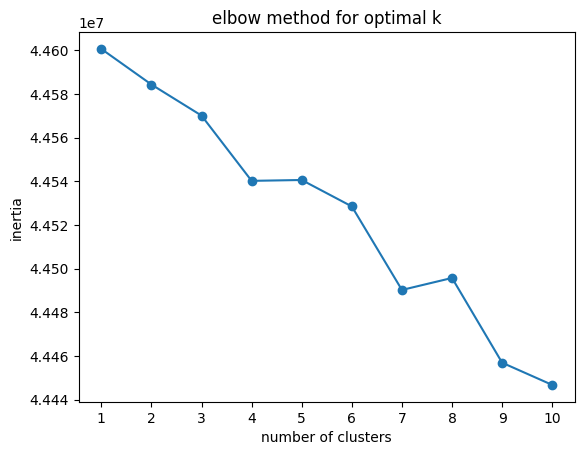

In [250]:
#Using elbow method to find optimal K
plt.plot(range(1,11), inertia, marker='o')
plt.title("elbow method for optimal k")
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(range(1,11))
plt.show()

## Evaluation
Evaluate the clustering result using appropriate metrics.


## Plot the data points with their predicted cluster center

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?